In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each lat/lng combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [6]:
# Import the API key
from config import weather_api_key

# Import the requests library
import requests

# Starting URL for Weather Map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=" + weather_api_key

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval.    ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    #Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into the city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat,
                          'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date})

    #If an error is experienced, skip the city
    except:
        print('City not found. Skipping...')
        pass
    
# Indicate that Data Loading is complete.
print('-----------------------------')
print('Data Retrieval Complete      ')
print('-----------------------------')
    


Beginning Data Retrieval.    
-----------------------------
Processing Record 1 of Set 1 | carutapera
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | camacha
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | san juan
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | hami
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | malinyi
Processing Record 16 of Set 1 | moerai
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | mayor pablo lagerenza
Processing Record 19 of Set 1 | sao filipe
Processing Record 20 of Set 1 | bambanglipuro
Processing Record 21 of Set 1 | ostrovnoy
Processing Reco

In [8]:
# Tally number of cities
len(city_data)

567

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carutapera,-1.1950,-46.0200,77.34,93,100,5.46,BR,2022-05-03 19:39:38
1,Chokurdakh,70.6333,147.9167,27.16,96,100,3.94,RU,2022-05-03 19:39:39
2,Kapaa,22.0752,-159.3190,79.12,78,40,16.11,US,2022-05-03 19:35:53
3,Rikitea,-23.1203,-134.9692,77.54,77,100,17.52,PF,2022-05-03 19:39:40
4,Hermanus,-34.4187,19.2345,62.15,93,0,7.67,ZA,2022-05-03 19:35:20
5,Camacha,33.0833,-16.3333,60.22,63,20,14.97,PT,2022-05-03 19:39:41
6,Albany,42.6001,-73.9662,65.88,57,100,4.00,US,2022-05-03 19:39:41
7,San Juan,-31.5375,-68.5364,74.86,18,0,5.48,AR,2022-05-03 19:39:42
8,Jamestown,42.0970,-79.2353,62.24,77,100,8.05,US,2022-05-03 19:39:42
9,Longyearbyen,78.2186,15.6401,13.84,62,75,13.80,SJ,2022-05-03 19:39:43


In [10]:
new_column_order = ['City', 'Country', 'Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Carutapera,BR,2022-05-03 19:39:38,-1.1950,-46.0200,77.34,93,100,5.46
1,Chokurdakh,RU,2022-05-03 19:39:39,70.6333,147.9167,27.16,96,100,3.94
2,Kapaa,US,2022-05-03 19:35:53,22.0752,-159.3190,79.12,78,40,16.11
3,Rikitea,PF,2022-05-03 19:39:40,-23.1203,-134.9692,77.54,77,100,17.52
4,Hermanus,ZA,2022-05-03 19:35:20,-34.4187,19.2345,62.15,93,0,7.67


In [11]:
# Create the output file (CSV).
output_data_file = 'weather_data/cities.csv'

# Export city_data into CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Plot latitude vs temperature

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

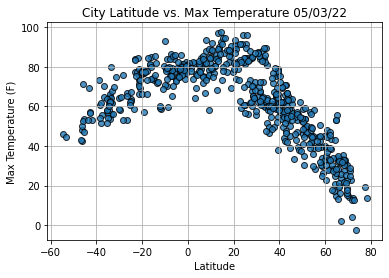

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()

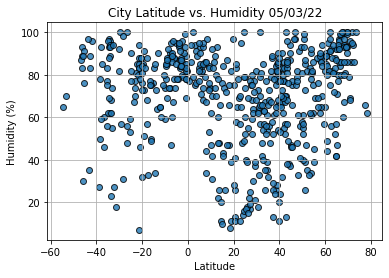

In [16]:
# Build the scatter plot for latitude vs humidity.
plt.scatter(lats,
            humidity,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig2.png')

# Show plot.
plt.show()

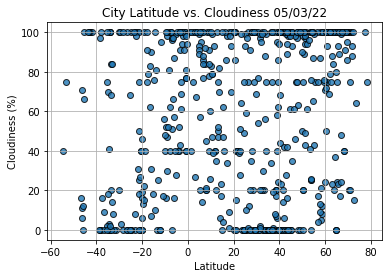

In [17]:
# Build the scatter plot for latitude vs cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Cloudiness ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig3.png')

# Show plot.
plt.show()

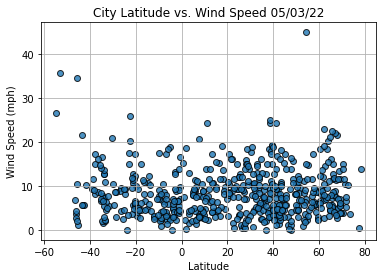

In [18]:
# Build the scatter plot for latitude vs wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig4.png')

# Show plot.
plt.show()

In [22]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to perform linear regression on weather data and plot a regression line and equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                       Moerai
Country                        PF
Date          2022-05-03 19:39:45
Lat                      -22.4333
Lng                     -151.3333
Max Temp                    77.68
Humidity                       85
Cloudiness                    100
Wind Speed                  20.09
Name: 13, dtype: object

In [20]:
city_data_df.loc[(city_data_df['Lat']>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Chokurdakh,RU,2022-05-03 19:39:39,70.6333,147.9167,27.16,96,100,3.94
2,Kapaa,US,2022-05-03 19:35:53,22.0752,-159.3190,79.12,78,40,16.11
5,Camacha,PT,2022-05-03 19:39:41,33.0833,-16.3333,60.22,63,20,14.97
6,Albany,US,2022-05-03 19:39:41,42.6001,-73.9662,65.88,57,100,4.00
8,Jamestown,US,2022-05-03 19:39:42,42.0970,-79.2353,62.24,77,100,8.05


In [21]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]

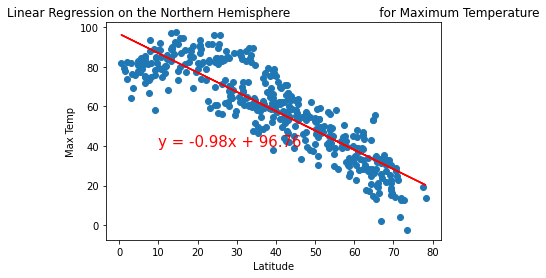

In [31]:
# Linear regression on Northern Hemisphere for Max Temp
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                       for Maximum Temperature', 'Max Temp', (10,40))

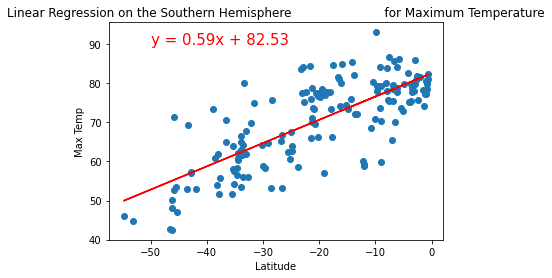

In [47]:
# Linear regression on Southern Hemisphere for Max Temp
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp', (-50,90))

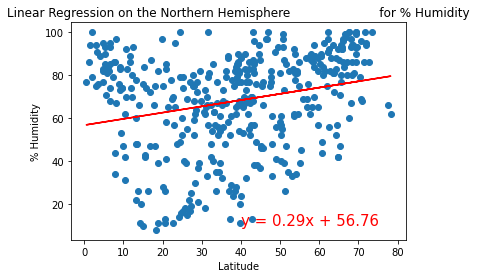

In [50]:
# Linear regression on Northern Hemisphere for Humidity
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                       for % Humidity', '% Humidity', (40,10))

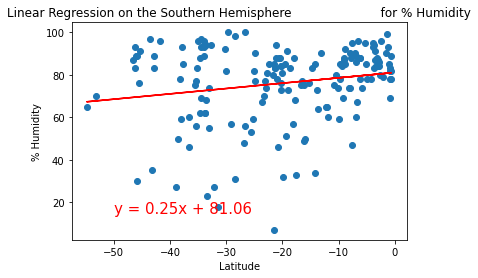

In [51]:
# Linear regression on Southern Hemisphere for Humidity
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\
                       for % Humidity', '% Humidity', (-50,15))

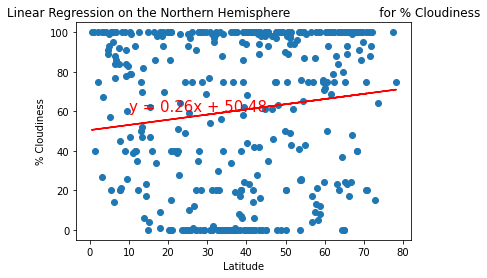

In [52]:
# Linear regression on Northern Hemisphere for Cloudiness
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                       for % Cloudiness', '% Cloudiness', (10,60))

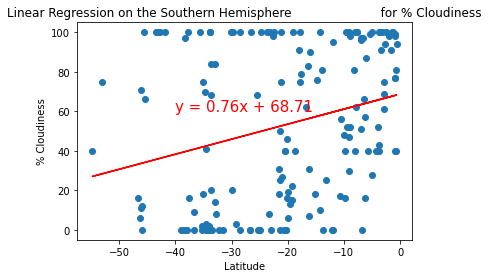

In [54]:
# Linear regression on Southern Hemisphere for Cloudiness
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\
                       for % Cloudiness', '% Cloudiness', (-40,60))

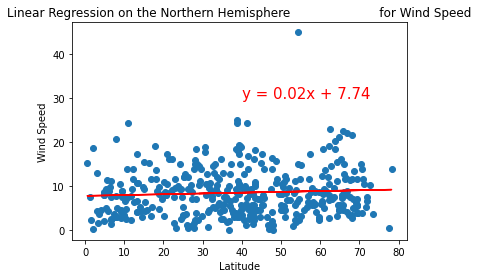

In [58]:
# Linear regression on Northern Hemisphere for Wind Speed
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                       for Wind Speed', 'Wind Speed', (40,30))

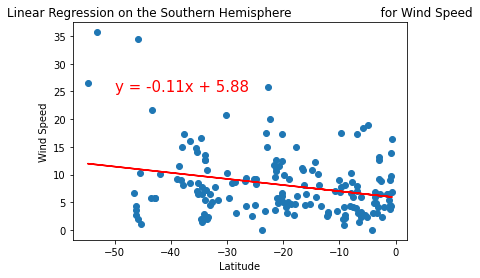

In [57]:
# Linear regression on Southern Hemisphere for Wind Speed
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\
                       for Wind Speed', 'Wind Speed', (-50,25))